|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Zainab Melaibari

# Q1: Import labraries

In [14]:
# write your code here ^_^

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [15]:
# write your code here ^_^
data = pd.read_csv('instagram_users.csv')
data

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,real
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,real
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,real
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,real


# Q3: Split tha dataset into training and testing

In [16]:
# write your code here ^_^

from sklearn.model_selection import train_test_split

X = data.drop('real_fake',axis=1)
y = data['real_fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

name: 
 DecisionTreeClassifier() 

accuracy: 
 0.8543115077306216 

classification report: 
               precision    recall  f1-score   support

        fake       0.85      0.86      0.85      9579
        real       0.86      0.85      0.85      9695

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274
 

confusion matrix: 
 [[8223 1356]
 [1452 8243]] 

display confusion matrix: 



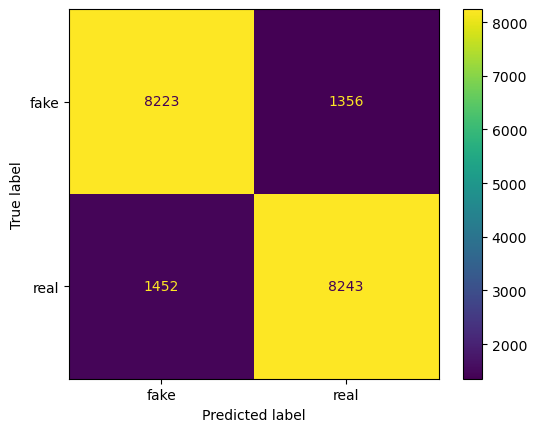

In [17]:
# write your code here ^_^

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier

firstModel = DecisionTreeClassifier()

firstModel.fit(X_train,y_train)

y_pred = firstModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred, labels = firstModel.classes_)

print("name: \n", firstModel, "\n\naccuracy: \n", accuracy, "\n\nclassification report: \n", classification_report(y_test, y_pred), "\n\nconfusion matrix: \n", c_matrix, "\n\ndisplay confusion matrix: \n")
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = firstModel.classes_)
disp.plot()
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

name: 
 RandomForestClassifier(max_depth=5, n_estimators=15) 

accuracy: 
 0.872730102729065 

classification report: 
               precision    recall  f1-score   support

        fake       0.96      0.77      0.86      9579
        real       0.81      0.97      0.88      9695

    accuracy                           0.87     19274
   macro avg       0.89      0.87      0.87     19274
weighted avg       0.89      0.87      0.87     19274
 

confusion matrix: 
 [[7395 2184]
 [ 269 9426]] 

display confusion matrix: 



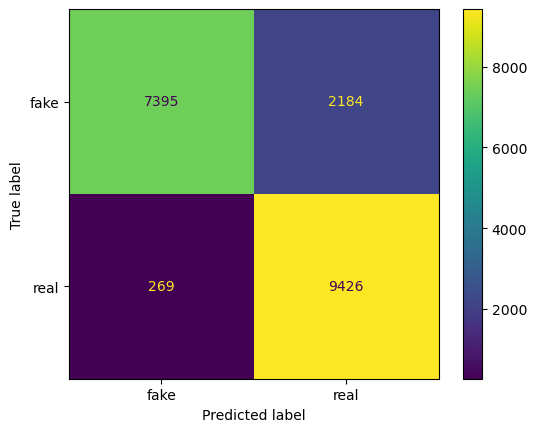

In [18]:
# write your code here ^_^

from sklearn.ensemble import RandomForestClassifier

secondModel = RandomForestClassifier(n_estimators = 15, criterion = 'gini', max_depth = 5) 
secondModel.fit(X_train, y_train)

y_pred = secondModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred, labels = secondModel.classes_)

print("name: \n", secondModel, "\n\naccuracy: \n", accuracy, "\n\nclassification report: \n", classification_report(y_test, y_pred), "\n\nconfusion matrix: \n", c_matrix, "\n\ndisplay confusion matrix: \n")
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = secondModel.classes_)
disp.plot()
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

C:\Users\zainab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


name: 
 LogisticRegression() 

accuracy: 
 0.7574971464148594 

classification report: 
               precision    recall  f1-score   support

        fake       0.79      0.69      0.74      9579
        real       0.73      0.82      0.77      9695

    accuracy                           0.76     19274
   macro avg       0.76      0.76      0.76     19274
weighted avg       0.76      0.76      0.76     19274
 

confusion matrix: 
 [[6620 2959]
 [1715 7980]] 

display confusion matrix: 



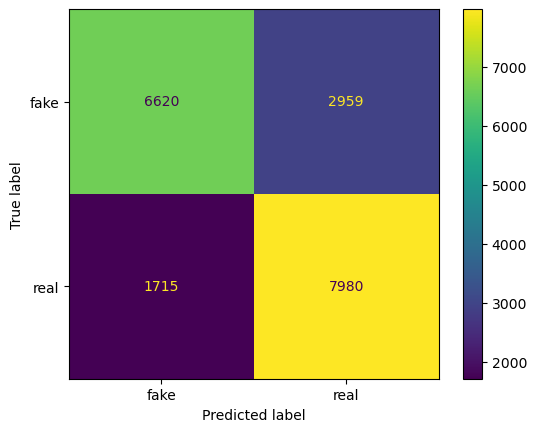

In [19]:
# write your code here ^_^

from sklearn.linear_model import LogisticRegression

thirdModel= LogisticRegression()

thirdModel.fit(X_train,y_train)

y_pred = thirdModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred, labels = thirdModel.classes_)

print("name: \n", thirdModel, "\n\naccuracy: \n", accuracy, "\n\nclassification report: \n", classification_report(y_test, y_pred), "\n\nconfusion matrix: \n", c_matrix, "\n\ndisplay confusion matrix: \n")
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = thirdModel.classes_)
disp.plot()
plt.show()